In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)


2.8.2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, BatchNormalization, UpSampling2D
from sklearn.model_selection import train_test_split
import tensorflow.keras.backend as K
from tensorflow.keras.regularizers import l2
from google.colab import drive
import skimage.io
#drive.mount('/content/drive')



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
bee = np.load('/content/drive/My Drive/full_numpy_bitmap_bee.npy').reshape(120890,28,28,1)
crocodile = np.load('/content/drive/My Drive/full_numpy_bitmap_crocodile.npy').reshape(127932,28,28,1)
dragon = np.load('/content/drive/My Drive/full_numpy_bitmap_dragon.npy').reshape(124362,28,28,1)
eye = np.load('/content/drive/My Drive/full_numpy_bitmap_eye.npy').reshape(125888,28,28,1)
fish = np.load('/content/drive/My Drive/full_numpy_bitmap_fish.npy').reshape(134150,28,28,1)
flamingo = np.load('/content/drive/My Drive/full_numpy_bitmap_flamingo.npy').reshape(124569,28,28,1)
hedgehog = np.load('/content/drive/My Drive/full_numpy_bitmap_hedgehog.npy').reshape(120527,28,28,1)
hotdog = np.load('/content/drive/My Drive/full_numpy_bitmap_hot dog.npy').reshape(181999,28,28,1)
octopus = np.load('/content/drive/My Drive/full_numpy_bitmap_octopus.npy').reshape(150152,28,28,1)
telephone = np.load('/content/drive/My Drive/full_numpy_bitmap_telephone.npy').reshape(127885,28,28,1)

results = ['bee',
          'crocodile',
          'dragon',
          'eye',
          'fish',
          'flamingo',
          'hedgehog',
          'hotdog',
          'octopus',
          'telephone']
classes = 10
samples = 40000

In [ ]:
bee = bee[0:samples]
crocodile = crocodile[0:samples]
dragon = dragon[0:samples]
eye = eye[0:samples]
fish = fish[0:samples]
flamingo = flamingo[0:samples]
hedgehog = hedgehog[0:samples]
hotdog = hotdog[0:samples]
octopus = octopus[0:samples]
telephone = telephone[0:samples]

X = np.concatenate((bee,
                    crocodile,
                    dragon,
                    eye,
                    fish,
                    flamingo,
                    hedgehog,
                    hotdog,
                    octopus,
                    telephone),
                    axis = 0)
print(X.shape)
#X = X.reshape(50000,28,28,1)
X = X/255
Y = np.empty((samples * classes, 1))

for i in range(0, classes) :
  Y[i * samples : samples * (i + 1)] = i
print(Y.shape)

(400000, 28, 28, 1)
(400000, 1)


In [ ]:
from sklearn.model_selection import train_test_split
xtr , xts , ytr, yts = train_test_split(X,Y, test_size = 0.2, random_state = 42)
print(xts.shape)

(80000, 28, 28, 1)


In [ ]:
K.clear_session()
l=.001
model = tf.keras.models.Sequential()
model.add(Conv2D(64, (5,5), activation = 'relu', padding = 'valid', input_shape = (28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (5,5), activation = 'relu', padding = 'valid'))     
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(120,activation = 'relu', kernel_regularizer = l2(l)))
model.add(Dense(84,activation = 'relu', kernel_regularizer = l2(l)))
model.add(Dense(classes,activation = 'softmax'))
opt = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
hist = model.fit(xtr,ytr,validation_split = 0.2, batch_size = 100, epochs = 10)

Epoch 1/10
2560/2560 [==============================] - 24s 5ms/step - loss: 0.6758 - accuracy: 0.8308 - val_loss: 0.4771 - val_accuracy: 0.8812
Epoch 2/10
2560/2560 [==============================] - 12s 5ms/step - loss: 0.4374 - accuracy: 0.8901 - val_loss: 0.4232 - val_accuracy: 0.8914
Epoch 3/10
2560/2560 [==============================] - 13s 5ms/step - loss: 0.3857 - accuracy: 0.9010 - val_loss: 0.3809 - val_accuracy: 0.9015
Epoch 4/10
2560/2560 [==============================] - 13s 5ms/step - loss: 0.3603 - accuracy: 0.9074 - val_loss: 0.3631 - val_accuracy: 0.9066
Epoch 5/10
2560/2560 [==============================] - 12s 5ms/step - loss: 0.3421 - accuracy: 0.9112 - val_loss: 0.3503 - val_accuracy: 0.9086
Epoch 6/10
2560/2560 [==============================] - 13s 5ms/step - loss: 0.3281 - accuracy: 0.9150 - val_loss: 0.3427 - val_accuracy: 0.9097
Epoch 7/10
2560/2560 [==============================] - 12s 5ms/step - loss: 0.3177 - accuracy: 0.9173 - val_loss: 0.3421 - val_ac

test accuracy: 91.2325%


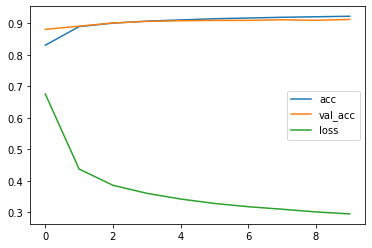

In [ ]:
import sklearn
xts = xts.reshape(xts.shape[0], 28, 28, 1)
yhat = model.predict(xts)
yhat_max = np.ones(len(yhat[:,0]))
for i in range(len(yhat[:,0])) :
  yhat_max[i] = np.argmax(yhat[i])

accTs = sklearn.metrics.accuracy_score(yts, yhat_max)
print('test accuracy: ' + str(accTs * 100) + '%')
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.legend(['acc','val_acc','loss'])
plt.show()
#print ("test accuracy-", acc , "%")

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount = True)

Mounted at /content/drive


In [ ]:
import skimage
inputSamples = 10
inputSample = 3
testSample = 3
inputs = [0]* inputSamples
inputdr = [0]* inputSample
inputtest = [0]* inputSample
i = 0
j = 0

for i in range (0,inputSamples):
  j = i+1
  inputs[i] = skimage.io.imread('/content/drive/My Drive/input/img' + str(j) + '.png')
k = 0  
for k in range (0,inputSample):
  z = k+1
  if z == 2:
    z = z+1
  inputdr[k] = skimage.io.imread('/content/drive/My Drive/input/papimg' + str(z) + '.png')
for q in range (1,inputSample):
  n = q+1
  inputtest[q] = skimage.io.imread('/content/drive/My Drive/input/testimg' + str(n) + '.png')


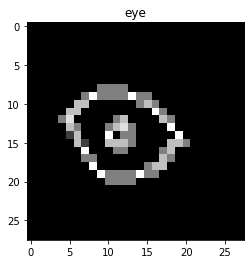

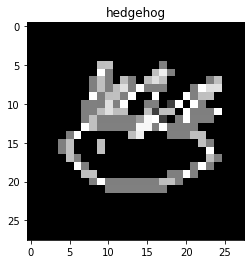

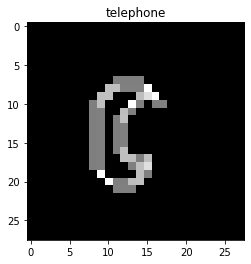

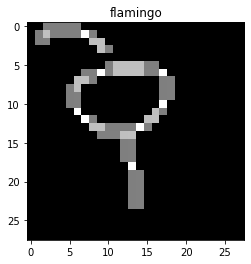

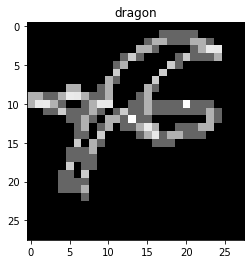

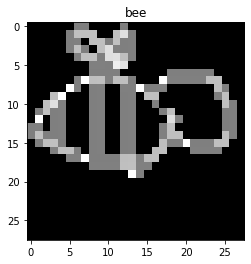

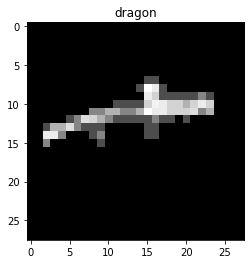

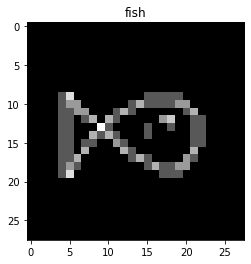

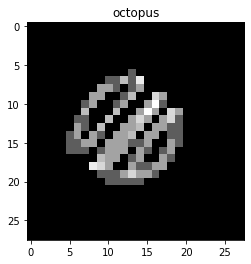

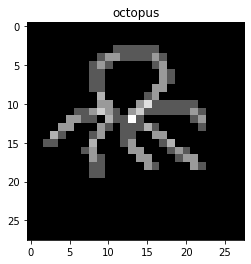

In [ ]:
def test(img):
  img = img[:,:,0]
  img = img.reshape(1,28,28,1)
  yhat = model.predict(img)
  img = img.reshape(28,28)
  plt.title(results[np.argmax(yhat)])
  plt.imshow(img,'gray')
  plt.show()
  
def testdraw(img):
  img = img[:,:,0]
  img = img.reshape(1,28,28,1)
  img = img/255
  img[img>.6] =1
  img[img<.7] =0
  img = 1-img
  yhat = model.predict_proba(img)
  img = img.reshape(28,28)
  plt.title(results[np.argmax(yhat)])
  plt.imshow(img, 'gray')
  
for cim in range(len(inputs)) :
  test(inputs[cim])